In [608]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

### Prediction Results Tables for IBX

In [792]:
wd_evening_pred = pd.read_csv(r'..\Models\Outputs\wd_evening_pred.csv', index_col = 0)
wd_morning_pred = pd.read_csv(r'..\Models\Outputs\wd_morning_pred.csv', index_col = 0)
wd_overnight_pred = pd.read_csv(r'..\Models\Outputs\wd_overnight_pred.csv', index_col = 0)
we_evening_pred = pd.read_csv(r'..\Models\Outputs\we_evening_pred.csv', index_col = 0)
we_morning_pred = pd.read_csv(r'..\Models\Outputs\we_morning_pred.csv', index_col = 0)
we_overnight_pred = pd.read_csv(r'..\Models\Outputs\we_overnight_pred.csv', index_col = 0)

In [723]:
wd_evening_pred

,Complex ID,VoroID,entries,exits,activity
0,614,312.0,9529.868513,7169.398420,16699.266933
1,611,298.0,13117.735694,8956.318279,22074.053974
2,601,347.0,4662.668628,4772.550768,9435.219396
3,635,232.0,3774.847657,1833.663978,5608.511636
4,620,124.0,4313.688884,4023.407435,8337.096319
...,...,...,...,...,...
428,X14,62.0,291.942817,583.065852,875.008670
429,X15,86.0,266.933239,416.176744,683.109983
430,X6,179.0,800.347923,1603.349266,2403.697190
431,X7,46.0,411.243517,772.929992,1184.173509


In [793]:
wd_entries_exits = wd_morning_pred.merge(wd_evening_pred, on = 'Complex ID', suffixes=('_m', '_e'))

we_entries_exits = we_morning_pred.merge(we_evening_pred, on = 'Complex ID', suffixes=('_m', '_e'))

In [796]:
we_entries_exits

,Complex ID,VoroID_m,entries_m,exits_m,VoroID_e,entries_e,exits_e,VoroID,entries,exits
0,614,312.0,3175.859801,7959.788932,312.0,5701.839984,7184.243323,312.0,742.306665,1115.192688
1,611,298.0,3510.430812,7474.683481,298.0,5906.628289,6688.359885,298.0,845.396640,927.711766
2,601,347.0,1820.040984,3688.780544,347.0,2591.221289,3865.315463,347.0,340.686258,542.940219
3,635,232.0,721.574970,1160.806228,232.0,1114.186388,1030.223543,232.0,184.740786,241.117030
4,620,124.0,1436.020622,2817.856126,124.0,1928.108457,2930.536898,124.0,286.085957,505.345753
...,...,...,...,...,...,...,...,...,...,...
428,X14,62.0,382.622189,227.050748,62.0,224.827540,375.676616,62.0,47.625127,119.269796
429,X15,86.0,250.510327,176.677298,86.0,168.274672,276.965475,86.0,41.869238,99.563352
430,X6,179.0,1118.170061,705.604941,179.0,640.292137,973.096121,179.0,134.485328,264.317255
431,X7,46.0,478.170921,288.133097,46.0,270.576075,465.162313,46.0,58.075652,156.460337


In [794]:
wd_entries_exits = wd_entries_exits.merge(wd_overnight_pred, on = 'Complex ID')

we_entries_exits = we_entries_exits.merge(we_overnight_pred, on = 'Complex ID')

In [797]:
wd_entries_exits['tot_entries'] = wd_entries_exits['entries_m'] + wd_entries_exits['entries_e'] + wd_entries_exits['entries']
wd_entries_exits['tot_exits'] = wd_entries_exits['exits_m'] + wd_entries_exits['exits_e'] + wd_entries_exits['exits']

we_entries_exits['tot_entries'] = we_entries_exits['entries_m'] + we_entries_exits['entries_e'] + we_entries_exits['entries']
we_entries_exits['tot_exits'] = we_entries_exits['exits_m'] + we_entries_exits['exits_e'] + we_entries_exits['exits']

In [800]:
peak_entries = wd_entries_exits['entries_m'] + wd_entries_exits['entries_e']
peak_entries.name = 'peak_entries'

peak_exits = wd_entries_exits['exits_m'] + wd_entries_exits['exits_e']
peak_exits.name = 'peak_exits'

offpeak_entries = wd_entries_exits['entries'] + we_entries_exits['entries_m'] + we_entries_exits['entries_e'] + we_entries_exits['entries']
offpeak_entries.name = 'offpeak_entries'

offpeak_exits = wd_entries_exits['exits'] + we_entries_exits['exits_m'] + we_entries_exits['exits_e'] + we_entries_exits['exits']
offpeak_exits.name = 'offpeak_exits'

In [801]:
peak_offpeak_pred = wd_morning_pred[['Complex ID', 'VoroID']].merge(peak_entries, left_index = True, right_index=True) \
    .merge(peak_exits, left_index = True, right_index=True) \
    .merge(offpeak_entries, left_index = True, right_index=True) \
    .merge(offpeak_exits, left_index = True, right_index=True) 

peak_offpeak_pred

,Complex ID,VoroID,peak_entries,peak_exits,offpeak_entries,offpeak_exits
0,614,312.0,14632.048504,19996.948244,10084.213494,17062.622917
1,611,298.0,20249.922128,27960.712538,10968.608572,15909.043257
2,601,347.0,8009.172004,11796.845368,4984.065000,8453.013941
3,635,232.0,5861.063445,6188.993029,2257.820718,2735.943872
4,620,124.0,7374.062917,10569.188790,3894.854200,6652.884227
...,...,...,...,...,...,...
428,X14,62.0,1293.455590,886.792661,741.780045,842.324842
429,X15,86.0,947.735086,692.744397,522.230305,657.867132
430,X6,179.0,3749.493150,2521.777090,2172.523818,2245.837477
431,X7,46.0,1757.315123,1225.027219,922.718374,1080.426695


In [604]:
IBX_sta = ['X1', 'X5', 'X6', 'X7', 'X8', 'X12', 'X14', 'X15', 'X16', '48', '135', '108', '246', '130', '133']

ibx_pred = peak_offpeak_pred.loc[peak_offpeak_pred['Complex ID'].isin(IBX_sta)]

In [607]:
ibx_pred

,Complex ID,VoroID,peak_entries,peak_exits,offpeak_entries,offpeak_exits,name,node_id
0,X5,175.0,1049.951930,416.552874,430.526931,410.572987,Brooklyn College,X5
1,135,141.0,1842.235536,1455.149427,992.151949,1357.847773,Livonia Av,L26
2,X1,169.0,580.627627,290.298330,201.933048,253.247254,Brooklyn Army Terminal,X1
3,X16,82.0,743.928451,493.109579,503.880967,619.372824,Jackson Hts,X16
4,48,176.0,2200.344418,1385.400648,896.695612,1143.116494,Avenue H,D32
5,246,189.0,1872.895851,1079.010463,738.252293,893.827311,Avenue I,F31
6,130,140.0,1157.246125,713.062615,585.375381,767.682651,Wilson Av,L20
7,133,221.0,2383.197341,1885.489327,1091.759164,1533.024624,Atlantic Av,L24
8,108,32.0,3048.199852,1443.655092,1207.319043,1334.211203,Middle Village - Metropolitan Av,M01
9,X12,57.0,706.824090,282.682631,350.208811,333.645689,Myrtle Av,X12


In [606]:
name_complex = pd.read_csv('station_complex_nodes.csv', usecols = ['Complex ID', 'name', 'node_id'])

ibx_pred = ibx_pred.merge(name_complex, on = 'Complex ID')

In [472]:
ibx_pred_peak = ibx_pred.loc[:, ['peak_entries', 'peak_exits']].set_index(ibx_pred['name'].values)
ibx_pred_offpeak = ibx_pred.loc[:, ['offpeak_entries', 'offpeak_exits']].set_index(ibx_pred['name'].values)

def prep_df(df, name):
    df = df.stack().reset_index()
    df.columns = ['c1', 'c2', 'values']
    df['Time'] = name
    df['type'] = df['c2'].str.split('_').map(lambda x: x[1].capitalize())
    return df

ibx_pred_peak = prep_df(ibx_pred_peak, 'Peak')
ibx_pred_offpeak = prep_df(ibx_pred_offpeak, 'Offpeak')
ibx_pred_mg = pd.concat([ibx_pred_peak, ibx_pred_offpeak])

In [517]:
import altair as alt

#source = ibx_pred.melt(id_vars='Complex ID', value_vars=['peak_entries', 'offpeak_entries'])
source = ibx_pred_mg

alt.Chart(source).mark_bar().encode(
    x = alt.X('type:N', title = None),
    y = alt.Y('sum(values):Q', axis = alt.Axis(
        grid = False, 
        title = 'Predicted Passenger Count')),
    column = alt.Column('c1:N', title = None, spacing=8, header = alt.Header( 
        labelAngle = 45,
        labelAlign='right',
        labelOrient = 'bottom',
        labelPadding = 0
        )
    ),
    color = alt.Color('Time:N')
).configure_view(
    strokeOpacity = 0
)
# ).facet(
#     facet = alt.Facet('c1:N', title = 'IBX Station'),
#     columns = 8
# )

alt.Chart(...)

### Activity Map

In [726]:
wd_evening_pred_is = pd.read_csv(r'..\Models\Outputs\wd_evening_pred_is.csv', index_col = 0, dtype = {'Complex ID': 'str'})
wd_morning_pred_is = pd.read_csv(r'..\Models\Outputs\wd_morning_pred_is.csv', index_col = 0, dtype = {'Complex ID': 'str'})
wd_overnight_pred_is = pd.read_csv(r'..\Models\Outputs\wd_overnight_pred_is.csv', index_col = 0, dtype = {'Complex ID': 'str'})
we_evening_pred_is = pd.read_csv(r'..\Models\Outputs\we_evening_pred_is.csv', index_col = 0, dtype = {'Complex ID': 'str'})
we_morning_pred_is = pd.read_csv(r'..\Models\Outputs\we_morning_pred_is.csv', index_col = 0, dtype = {'Complex ID': 'str'})
we_overnight_pred_is = pd.read_csv(r'..\Models\Outputs\we_overnight_pred_is.csv', index_col = 0, dtype = {'Complex ID': 'str'})

In [728]:
for df in [wd_evening_pred_is, wd_morning_pred_is, wd_overnight_pred_is, we_evening_pred_is, we_morning_pred_is, we_overnight_pred_is]:
    df['activity'] = df['entries'] + df['exits']

for df in [wd_evening_pred, wd_morning_pred, wd_overnight_pred, we_evening_pred, we_morning_pred, we_overnight_pred]:
    df['activity'] = df['entries'] + df['exits']

##### Troubleshooting

In [ ]:
attributes_now = pd.read_csv(r'..\PLUTO Data Processing\attributes_now_raw_final.csv', index_col=0); attributes_now

In [ ]:
attributes = pd.read_csv(r'..\PLUTO Data Processing\attributes_ibx_raw_final.csv', index_col=0); attributes

In [531]:
attributes.loc[attributes['VoroID'].isin([141.0, 92.0, 193.0])]

,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,housed_pop_Num,group_house_pop_num,industrial_pop_num,avg_household,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Employment_est,geometry,station_id,station_line,lat,Complex ID,name,lines,boro,long,line_,dir,pf_id,node_id,Bus_Stops,BCT2020,GeoType,Borough,GeoID,Name,CD Type,NTA Type,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape_Leng,Shape_Area,Unnamed: 0
140,141.0,2.027711e+05,232102.775721,42682.592696,186264.601246,18287.559775,7546.458738,2263.420978,1344.249477,8373.627683,4867.276045,50.953652,97.493753,199.447172,206.822358,8.801996e+06,488.212237,479.949912,8.262324,0.000000,0.360511,119.237210,123.315369,7.520468,322.955955,5.518392,5.044288,23.857764,192.53307,184.444185,8.088886,322.321425,POLYGON ((308668.8842152682 55009.091607194394...,L26,station,40.664038,135,Livonia Av,NaN,Bk,-73.900571,L IBX,station,station,L26,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,193.0,5.018295e+05,870494.588539,118836.534809,714671.536712,12245.258085,38605.342689,7829.593097,8105.438389,399.733065,51647.828604,179.207219,377.201577,708.875716,751.254332,3.555321e+07,1744.568528,1729.728586,14.839941,2.531292,1.098591,341.081144,182.018317,534.598713,849.152793,44.400590,37.237384,97.160731,721.81376,674.698968,47.114792,1391.800371,POLYGON ((304583.0261690911 55355.925804431194...,242,station,40.662742,354,Sterling St,NaN,Bk,-73.950850,2 5,station,station,242,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
422,92.0,1.134501e+06,513054.812288,96550.446954,335237.576626,3374.154486,20937.496337,33591.597477,1026.712200,1702.497253,35655.867872,226.733472,291.497225,298.627307,316.528430,2.244204e+07,811.790896,806.245776,5.545120,0.000000,0.497499,143.416786,222.946781,346.130473,53.464726,101.550728,49.215160,38.483028,314.77156,298.574613,16.196946,689.873798,"POLYGON ((312258.3672703518 54045.86229993577,...",H01,station,40.668234,196,Aqueduct Racetrack,NaN,Q,-73.834058,A,station,station,H01,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,92.0,1.134501e+06,513054.812288,96550.446954,335237.576626,3374.154486,20937.496337,33591.597477,1026.712200,1702.497253,35655.867872,226.733472,291.497225,298.627307,316.528430,2.244204e+07,811.790896,806.245776,5.545120,0.000000,0.497499,143.416786,222.946781,346.130473,53.464726,101.550728,49.215160,38.483028,314.77156,298.574613,16.196946,689.873798,"POLYGON ((312258.3672703518 54045.86229993577,...",H02,station,40.668234,197,Aqueduct - N Conduit Av,NaN,Q,-73.834058,A,station,station,H02,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [585]:
merged = pd.read_csv(r'..\mg_IBX_log.csv', index_col=0); merged

,complex_id,Stop Name,Complex_id,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekday_overnight,entries_weekday_overnight,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,Employment_est,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,Complex ID,boro,lat,long
0,614,59 ST-COLUMBUS CIRCLE,614c,9.298917,9.651250,10.135658,9.403225,6.793914,6.521357,9.127726,9.066087,9.505842,8.820072,6.899723,6.810556,0.022481,0.013806,0.022649,0.013907,312.0,14.800337,14.428242,13.576895,13.745622,12.742419,11.605464,11.040599,9.003309,-inf,12.489699,3.065612,5.144867,6.826222,6.921007,20.037300,7.189131,7.024843,7.089372,4.834664,-inf,4.785914,5.024356,6.690062,4.136770,5.485091,2.547917,3.952307,6.769659,6.577074,5.027693,2.397895,"POLYGON ((301824.55302342365 66708.9891932036,...",614,M,40.768271,-73.981832
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,10.769301,10.378974,10.854118,10.483263,8.248025,8.394240,10.518188,10.075625,10.403939,9.803322,8.495906,8.524541,0.025420,0.016341,0.025604,0.016466,298.0,12.130081,14.624265,14.377155,12.156223,14.170175,12.062017,11.040255,9.507777,9.346048,11.118893,3.134126,5.396867,5.673069,6.458697,19.598824,5.997473,5.786083,5.897827,3.641931,-0.249985,3.280642,4.244751,5.225964,3.850395,4.402292,1.413687,2.629808,5.606418,5.460713,3.608279,2.890372,"POLYGON ((300819.9556917906 65186.39254541153,...",611,M,40.755746,-73.987581
2,601,14 ST,601c,8.989270,9.062817,9.509187,8.865527,6.546893,6.129105,8.815361,8.656868,9.050553,8.269821,6.976815,6.744280,0.024272,0.014947,0.024396,0.015019,347.0,12.092861,13.844648,12.961091,13.267247,12.405357,11.528345,9.458080,8.085312,3.737860,11.063050,3.833007,5.395577,6.395520,6.547598,18.855470,6.778691,6.614408,6.739125,3.529178,-inf,4.424306,4.158480,6.520853,3.005719,4.247685,2.133327,3.616262,6.355859,6.223137,4.270730,2.484907,POLYGON ((300018.70311794337 63592.29452049797...,601,M,40.737796,-73.997732
3,635,SOUTH FERRY,635c,8.796464,8.775997,9.015067,8.601594,6.962243,6.234166,8.335941,8.188515,8.278158,7.738515,7.163705,6.226537,0.020350,0.012717,0.020454,0.012778,232.0,12.249340,14.252788,14.179121,11.280086,14.082996,10.632056,9.606406,8.424494,-inf,11.170152,1.930308,4.456606,4.286471,5.180447,18.742771,4.913529,4.696568,4.826528,2.428501,-inf,3.047801,2.712439,4.350313,2.321817,3.182273,0.770273,1.959273,4.329258,4.111366,2.698535,3.332205,"POLYGON ((299005.254430176 59692.41751086594, ...",635,M,40.702249,-74.013100
4,620,BOROUGH HALL,620c,8.425664,8.806297,9.177489,8.869838,5.891161,5.330543,7.990789,7.782990,8.243546,7.823346,5.812263,5.234112,0.021319,0.013528,0.021334,0.013548,124.0,12.850410,14.257545,13.675609,13.375275,13.197601,11.274940,10.988997,8.559928,4.379211,12.134260,4.234678,5.660095,6.449035,7.792843,18.868180,6.998801,6.719064,6.953781,3.875739,0.046048,5.159184,4.578054,6.621957,3.798712,4.829044,2.175708,4.220048,6.364202,6.277986,3.870514,3.555348,POLYGON ((301032.3546363286 58806.695655445816...,620,Bk,40.693241,-73.990642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,X14,0,X14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016863,0.009802,0.000000,0.000000,62.0,14.939400,14.538850,12.786176,14.246686,10.122611,11.439705,9.432155,10.945905,10.438932,11.820096,6.959455,7.49400

In [586]:
merged_1 = pd.read_csv(r'..\mg_IBX_log_1.csv', index_col=0); merged_1

,complex_id,Stop Name,Complex_id,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekday_overnight,entries_weekday_overnight,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,Employment_est,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,Complex ID,boro,lat,long
0,614,59 ST-COLUMBUS CIRCLE,614c,9.298917,9.651250,10.135658,9.403225,6.793914,6.521357,9.127726,9.066087,9.505842,8.820072,6.899723,6.810556,0.022481,0.013806,0.022649,0.013907,312.0,14.800337,14.428242,13.576895,13.745622,12.742419,11.605464,11.040599,9.003309,-inf,12.489699,3.065612,5.144867,6.826222,6.921007,20.037300,7.189131,7.024843,7.089372,4.834664,-inf,4.785914,5.024356,6.690062,4.136770,5.485091,2.547917,3.952307,6.769659,6.577074,5.027693,2.397895,POLYGON ((301824.55302342365 66708.98919320358...,614,M,40.768271,-73.981832
1,611,TIMES SQ-42 ST,611c,10.769301,10.378974,10.854118,10.483263,8.248025,8.394240,10.518188,10.075625,10.403939,9.803322,8.495906,8.524541,0.025420,0.016341,0.025604,0.016466,298.0,12.130081,14.624265,14.377155,12.156223,14.170175,12.062017,11.040255,9.507777,9.346048,11.118893,3.134126,5.396867,5.673069,6.458697,19.598824,5.997473,5.786083,5.897827,3.641931,-0.249985,3.280642,4.244751,5.225964,3.850395,4.402292,1.413687,2.629808,5.606418,5.460713,3.608279,2.890372,"POLYGON ((300819.9556917906 65186.39254541152,...",611,M,40.755746,-73.987581
2,601,6 AV,601c,8.989270,9.062817,9.509187,8.865527,6.546893,6.129105,8.815361,8.656868,9.050553,8.269821,6.976815,6.744280,0.024272,0.014947,0.024396,0.015019,347.0,12.092861,13.844648,12.961091,13.267247,12.405357,11.528345,9.458080,8.085312,3.737860,11.063050,3.833007,5.395577,6.395520,6.547598,18.855470,6.778691,6.614408,6.739125,3.529178,-inf,4.424306,4.158480,6.520853,3.005719,4.247685,2.133327,3.616262,6.355859,6.223137,4.270730,2.484907,POLYGON ((300018.70311794337 63592.29452049797...,601,M,40.737796,-73.997732
3,635,WHITEHALL ST-SOUTH FERRY,635c,8.796464,8.775997,9.015067,8.601594,6.962243,6.234166,8.335941,8.188515,8.278158,7.738515,7.163705,6.226537,0.020350,0.012717,0.020454,0.012778,232.0,12.249340,14.252788,14.179121,11.280086,14.082996,10.632056,9.606406,8.424494,-inf,11.170152,1.930308,4.456606,4.286471,5.180447,18.742771,4.913529,4.696568,4.826528,2.428501,-inf,3.047801,2.712439,4.350313,2.321817,3.182273,0.770273,1.959273,4.329258,4.111366,2.698535,3.332205,"POLYGON ((299005.254430176 59692.41751086593, ...",635,M,40.702249,-74.013100
4,620,COURT ST,620c,8.425664,8.806297,9.177489,8.869838,5.891161,5.330543,7.990789,7.782990,8.243546,7.823346,5.812263,5.234112,0.021319,0.013528,0.021334,0.013548,124.0,12.850410,14.257545,13.675609,13.375275,13.197601,11.274940,10.988997,8.559928,4.379211,12.134260,4.234678,5.660095,6.449035,7.792843,18.868180,6.998801,6.719064,6.953781,3.875739,0.046048,5.159184,4.578054,6.621957,3.798712,4.829044,2.175708,4.220048,6.364202,6.277986,3.870514,3.555348,POLYGON ((301032.3546363285 58806.695655445816...,620,Bk,40.693241,-73.990642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,X14,0,X14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016863,0.009802,0.000000,0.000000,62.0,14.939400,14.538850,12.786176,14.246686,10.122611,11.439705,9.432155,10.945905,10.438932,11.820096,6.959455,7.494006,7.408599,7.

In [598]:
(merged != merged_1).sum()
merged.loc[merged['VoroID'] != merged_1['VoroID'], ['complex_id', 'VoroID', 'Stop Name']]

,complex_id,VoroID,Stop Name
232,222,0.0,ROOSEVELT ISLAND
329,196,81.0,AQUEDUCT RACETRACK
330,197,81.0,AQUEDUCT-N CONDUIT AV
332,199,0.0,BROAD CHANNEL
333,204,415.0,BEACH 67 ST
334,205,414.0,BEACH 60 ST
335,206,417.0,BEACH 44 ST
339,200,420.0,BEACH 90 ST
340,201,419.0,BEACH 98 ST
341,202,416.0,BEACH 105 ST


In [600]:
merged_1.loc[merged_1['VoroID'] != merged['VoroID'], ['complex_id', 'VoroID', 'Stop Name']]

,complex_id,VoroID,Stop Name
232,222,99999.0,ROOSEVELT ISLAND
329,196,92.0,AQUEDUCT RACETRACK
330,197,92.0,AQUEDUCT-N CONDUIT AV
332,199,99999.0,BROAD CHANNEL
333,204,424.0,BEACH 67 ST
334,205,423.0,BEACH 60 ST
335,206,426.0,BEACH 44 ST
339,200,429.0,BEACH 90 ST
340,201,428.0,BEACH 98 ST
341,202,425.0,BEACH 105 ST


In [588]:
merged.merge(merged_1, on = 'complex_id', indicator = True)

,complex_id,Stop Name_x,Complex_id_x,exits_weekday_evening_x,entries_weekday_evening_x,exits_weekday_morning_x,entries_weekday_morning_x,exits_weekday_overnight_x,entries_weekday_overnight_x,exits_weekend_evening_x,entries_weekend_evening_x,exits_weekend_morning_x,entries_weekend_morning_x,exits_weekend_overnight_x,entries_weekend_overnight_x,cs_ibx_peak_x,cs_ibx_offpeak_x,cs_noibx_peak_x,cs_noibx_offpeak_x,VoroID_x,lotarea_x,bldgarea_x,comarea_x,resarea_x,officearea_x,retailarea_x,garagearea_x,strgearea_x,factryarea_x,otherarea_x,numbldgs_x,numfloors_x,unitsres_x,unitstotal_x,assesstot_x,Total_pop_Num_x,Employment_est_x,housed_pop_Num_x,group_house_pop_num_x,industrial_pop_num_x,under18_num_x,hispanic_num_x,white_num_x,black_num_x,asian_num_x,other_num_x,multirace_num_x,total_houses_x,occupied_homes_num_x,vacant_homes_num_x,Bus_Stops_x,geometry_x,Complex ID_x,boro_x,lat_x,long_x,Stop Name_y,Complex_id_y,exits_weekday_evening_y,entries_weekday_evening_y,exits_weekday_morning_y,entries_weekday_morning_y,exits_weekday_overnight_y,entries_weekday_overnight_y,exits_weekend_evening_y,entries_weekend_evening_y,exits_weekend_morning_y,entries_weekend_morning_y,exits_weekend_overnight_y,entries_weekend_overnight_y,cs_ibx_peak_y,cs_ibx_offpeak_y,cs_noibx_peak_y,cs_noibx_offpeak_y,VoroID_y,lotarea_y,bldgarea_y,comarea_y,resarea_y,officearea_y,retailarea_y,garagearea_y,strgearea_y,factryarea_y,otherarea_y,numbldgs_y,numfloors_y,unitsres_y,unitstotal_y,assesstot_y,Total_pop_Num_y,Employment_est_y,housed_pop_Num_y,group_house_pop_num_y,industrial_pop_num_y,under18_num_y,hispanic_num_y,white_num_y,black_num_y,asian_num_y,other_num_y,multirace_num_y,total_houses_y,occupied_homes_num_y,vacant_homes_num_y,Bus_Stops_y,geometry_y,Complex ID_y,boro_y,lat_y,long_y,_merge
0,614,59 ST-COLUMBUS CIRCLE,614c,9.298917,9.651250,10.135658,9.403225,6.793914,6.521357,9.127726,9.066087,9.505842,8.820072,6.899723,6.810556,0.022481,0.013806,0.022649,0.013907,312.0,14.800337,14.428242,13.576895,13.745622,12.742419,11.605464,11.040599,9.003309,-inf,12.489699,3.065612,5.144867,6.826222,6.921007,20.037300,7.189131,7.024843,7.089372,4.834664,-inf,4.785914,5.024356,6.690062,4.136770,5.485091,2.547917,3.952307,6.769659,6.577074,5.027693,2.397895,"POLYGON ((301824.55302342365 66708.9891932036,...",614,M,40.768271,-73.981832,59 ST-COLUMBUS CIRCLE,614c,9.298917,9.651250,10.135658,9.403225,6.793914,6.521357,9.127726,9.066087,9.505842,8.820072,6.899723,6.810556,0.022481,0.013806,0.022649,0.013907,312.0,14.800337,14.428242,13.576895,13.745622,12.742419,11.605464,11.040599,9.003309,-inf,12.489699,3.065612,5.144867,6.826222,6.921007,20.037300,7.189131,7.024843,7.089372,4.834664,-inf,4.785914,5.024356,6.690062,4.136770,5.485091,2.547917,3.952307,6.769659,6.577074,5.027693,2.397895,POLYGON ((301824.55302342365 66708.98919320358...,614,M,40.768271,-73.981832,both
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,10.769301,10.378974,10.854118,10.483263,8.248025,8.394240,10.518188,10.075625,10.403939,9.803322,8.495906,8.524541,0.025420,0.016341,0.025604,0.016466,298.0,12.130081,14.624265,14.377155,12.156223,14.170175,12.062017,11.040255,9.507777,9.346048,11.118893,3.134126,5.396867,5.673069,6.458697,19.598824,5.997473,5.786083,5.897827,3.641931,-0.249985,3.280642,4.244751,5.225964,3.850395,4.402292,1.413687,2.629808,5.606418,5.460713,3.608279,2.890372,"POLYGON ((300819.9556917906 65186.39254541153,...",611,M,40.755746,-73.987581,TIMES SQ-42 ST,611c,10.769301,10.378974,10.854118,10.483263,8.248025,8.394240,10.518188,10.075625,10.403939,9.803322,8.495906,8.524541,0.025420,0.016341,0.025604,0.016466,298.0,12.130081,14.624265,14.377155,12.156223,14.170175,12.062017,11.040255,9.507777,9.346048,11.118893,3.134126,5.396867,5.673069,6.458697,19.598824,5.997473,5.786083,5.897827,3.641931,-0.249985,3.280642,4.244751,5.225964,3.850395,4.402292,1.413687,2.629808,5.606418,5.460713,3.608279,2.890372,"POLYGON ((300819.9556917906 65186.39254541152,...",611,M,40.755746,-73.987581,both
2,601,14 ST,601c

In [559]:
merged_noibx = pd.read_csv(r'..\mg_noIBX_log.csv', index_col=0); merged_noibx

,complex_id,Stop Name,Complex_id,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekday_overnight,entries_weekday_overnight,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,Employment_est,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,station_id,station_line,Complex ID,boro,lat,long
0,614,59 ST-COLUMBUS CIRCLE,614c,0.022481,0.013806,0.022649,0.013907,9.298917,9.651250,10.135658,9.403225,6.793914,6.521357,9.127726,9.066087,9.505842,8.820072,6.899723,6.810556,303.0,12.693937,14.383079,13.528277,13.714930,12.633452,11.552586,11.008984,8.953847,-inf,12.511687,2.833953,5.090029,6.803148,6.892009,19.509348,7.167244,7.012374,7.072072,4.767958,-inf,4.770068,4.985442,6.673420,4.047930,5.473576,2.511546,3.931604,6.748328,6.559092,4.990441,3.367296,"POLYGON ((301824.55302342365 66708.9891932036,...",complex,complex,614,M,40.768271,-73.981832
1,611,42 ST-PORT AUTHORITY BUS TERMINAL,611c,0.025420,0.016341,0.025604,0.016466,10.769301,10.378974,10.854118,10.483263,8.248025,8.394240,10.518188,10.075625,10.403939,9.803322,8.495906,8.524541,289.0,12.497129,14.999063,14.726644,12.576043,14.521133,12.415844,11.229943,9.793499,9.473400,11.599790,3.537029,5.741302,6.097120,6.827352,20.009176,6.457329,6.234002,6.348150,4.188471,0.310994,3.747362,4.736433,5.699104,4.442116,4.711584,1.883475,3.089712,6.071622,5.933139,4.026173,3.091042,"POLYGON ((300819.9556917906 65186.39254541153,...",complex,complex,611,M,40.755746,-73.987581
2,601,14 ST,601c,0.024272,0.014947,0.024396,0.015019,8.989270,9.062817,9.509187,8.865527,6.546893,6.129105,8.815361,8.656868,9.050553,8.269821,6.976815,6.744280,338.0,12.211654,13.954890,12.998074,13.433735,12.397780,11.616279,9.519522,8.048802,4.476890,11.178426,3.942612,5.507355,6.585622,6.718164,18.946292,6.944152,6.785162,6.909830,3.555066,-inf,4.560821,4.427148,6.668298,3.223554,4.457569,2.327235,3.799436,6.532454,6.401732,4.433127,2.397895,POLYGON ((300018.70311794337 63592.29452049797...,complex,complex,601,M,40.737796,-73.997732
3,635,SOUTH FERRY,635c,0.020350,0.012717,0.020454,0.012778,8.796464,8.775997,9.015067,8.601594,6.962243,6.234166,8.335941,8.188515,8.278158,7.738515,7.163705,6.226537,223.0,11.810492,13.783702,13.710388,10.806370,13.614764,10.158340,9.132690,7.950778,-inf,10.696436,1.464980,3.984908,3.812756,4.707058,18.273541,4.441092,4.222853,4.354207,1.954785,-inf,2.576837,2.246399,3.876598,1.848101,2.708557,0.296557,1.493706,3.856307,3.637651,2.228718,2.564949,"POLYGON ((299005.254430176 59692.41751086594, ...",complex,complex,635,M,40.702249,-74.013100
4,620,BOROUGH HALL,620c,0.021319,0.013528,0.021334,0.013548,8.425664,8.806297,9.177489,8.869838,5.891161,5.330543,7.990789,7.782990,8.243546,7.823346,5.812263,5.234112,25.0,12.654718,14.131958,13.573125,13.221910,13.116874,11.192660,10.881444,8.523040,4.180952,11.957398,4.058372,5.504403,6.304404,7.687792,18.748329,6.850235,6.594845,6.803328,3.767297,1.378526,4.991973,4.432311,6.475682,3.676316,4.669415,2.030936,4.044076,6.216409,6.132828,3.692963,3.218876,POLYGON ((299907.43438462145 58115.42587894805...,complex,complex,620,Bk,40.693241,-73.990642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,36,BAY RIDGE AV,R42,0.015606,0.010380,0.015384,0.010321,7.450951,6.739839,7.275294,8.025688,4.876151,5.071887,6.861450,6.313435,6.553933,7.046702,5.161208,4.308279,

In [546]:
merged.loc[merged['VoroID'].isin([141.0, 92.0, 193.0])]

,complex_id,Stop Name,Complex_id,exits_weekday_evening,entries_weekday_evening,exits_weekday_morning,entries_weekday_morning,exits_weekday_overnight,entries_weekday_overnight,exits_weekend_evening,entries_weekend_evening,exits_weekend_morning,entries_weekend_morning,exits_weekend_overnight,entries_weekend_overnight,cs_ibx_peak,cs_ibx_offpeak,cs_noibx_peak,cs_noibx_offpeak,VoroID,lotarea,bldgarea,comarea,resarea,officearea,retailarea,garagearea,strgearea,factryarea,otherarea,numbldgs,numfloors,unitsres,unitstotal,assesstot,Total_pop_Num,Employment_est,housed_pop_Num,group_house_pop_num,industrial_pop_num,under18_num,hispanic_num,white_num,black_num,asian_num,other_num,multirace_num,total_houses,occupied_homes_num,vacant_homes_num,Bus_Stops,geometry,Complex ID,boro,lat,long
39,135,LIVONIA AV,L26,6.843830,6.138375,6.669879,6.709243,4.866380,4.002321,5.530173,4.736198,5.32301,4.988730,4.640175,3.492712,0.018701,0.011950,0.017029,0.011060,141.0,12.219833,12.354936,10.661546,12.134924,9.813976,8.928834,7.724633,7.203591,9.032842,8.490290,3.930916,4.579788,5.295549,5.331860,15.990489,6.190750,5.775549,6.173682,2.111706,-inf,4.781115,4.814745,2.017628,5.777516,1.708087,1.618256,3.172110,5.260268,5.217347,2.090491,4.043051,"POLYGON ((308668.8842152682 55009.0916071944, ...",135,Bk,40.664038,-73.900571
108,354,STERLING ST,242,7.280525,6.469444,6.893124,7.575687,4.715593,4.489759,6.647202,6.026922,6.24647,6.687965,5.004785,3.868593,0.017678,0.011342,0.017415,0.011253,193.0,13.126016,13.676817,11.685504,13.479578,9.412894,10.561146,8.965666,9.000291,5.990797,10.852203,5.188543,5.932780,6.563680,6.621744,17.386541,7.464263,7.238353,7.455720,2.697322,0.92873,5.832120,5.204107,6.281516,6.744239,3.793253,3.617313,4.576367,6.581767,6.514267,3.852587,3.044522,"POLYGON ((304583.0261690911 55355.9258044312, ...",354,Bk,40.662742,-73.950850


In [554]:
faulty_ind = wd_evening_pred_is[wd_evening_pred_is.isnull().any(axis = 1)].index

wd_evening_pred.loc[wd_evening_pred.VoroID.isin([141.0, 92.0, 193.0])]

,Complex ID,VoroID,entries,exits
39,135,141.0,603.876774,627.357403
108,354,193.0,950.375152,835.268581


In [579]:
wd_evening_pred.loc[wd_evening_pred['Complex ID'] == '197']

,Complex ID,VoroID,entries,exits
330,197,81.0,637.676925,528.511444


In [573]:
wd_evening_pred.dtypes

Complex ID     object
VoroID        float64
entries       float64
exits         float64
dtype: object

In [583]:
wd_evening_pred_is.loc[wd_evening_pred_is['Complex ID'] == 197]

,Complex ID,VoroID,entries,exits
330,197.0,81.0,240.639964,572.704595


In [572]:
wd_evening_pred_is.dtypes

Complex ID    float64
VoroID        float64
entries       float64
exits         float64
dtype: object

In [468]:
we_morning_pred_is.iloc[faulty_ind]

,Complex ID,VoroID,entries,exits
36,NaN,NaN,2299.870383,5103.263058
41,NaN,NaN,412.556192,275.730885
43,NaN,NaN,1083.669716,753.654799
424,38.0,141.0,NaN,NaN
425,39.0,92.0,NaN,NaN
426,141.0,193.0,NaN,NaN


#### Activity Map

In [703]:
voro = gpd.read_file(r'..\PLUTO Data Processing\voronoi_ibx_final.geojson', geometry = 'geometry')
#voro.index.name = 'VoroID'
#voro.index = voro.index.astype(str)
#voro.crs
voro


,VoroID,geometry
0,0,"POLYGON ((318165.098 58718.185, 317190.134 643..."
1,1,"POLYGON ((318165.098 58718.185, 317190.134 643..."
2,2,"POLYGON ((315071.181 63329.288, 314195.643 635..."
3,3,"POLYGON ((316470.336 59650.473, 317090.179 599..."
4,4,"POLYGON ((315847.995 59379.378, 315590.708 600..."
...,...,...
425,425,"POLYGON ((314983.849 46003.675, 314968.837 459..."
426,426,"POLYGON ((318375.935 48818.728, 318378.874 488..."
427,427,"POLYGON ((314317.521 45745.523, 314303.619 457..."
428,428,"POLYGON ((315613.546 46228.440, 315609.097 462..."


##### Voro Troubleshooting

In [682]:
voro_base = gpd.read_file(r'..\PLUTO Data Processing\voronoi_now_final.geojson', geometry = 'geometry')

In [687]:
voro_base.loc[voro_base['VoroID'] == 274].area

274    1.278065e+06
dtype: float64

In [692]:
voro.loc[voro['VoroID'] == 283].area.values == voro_base.loc[voro_base['VoroID'] == 274].area.values

array([ True])

In [693]:
voro['area'] = voro['geometry'].area

In [695]:
voro_base['area'] = voro_base['geometry'].area

In [699]:
pd.merge(voro_base, voro, on = 'area', how = 'outer', indicator = True)['_merge'].value_counts()

both          328
right_only    102
left_only      93
Name: _merge, dtype: int64

##### Test Merge

In [705]:
test_merge = voro.merge(wd_evening_pred, on = 'VoroID')

,VoroID,geometry,Complex ID,entries,exits,activity
0,0,"POLYGON ((318165.098 58718.185, 317190.134 643...",255,1328.843679,2532.486553,3861.330232
1,1,"POLYGON ((318165.098 58718.185, 317190.134 643...",254,2827.640430,7926.436169,10754.076599
2,2,"POLYGON ((315071.181 63329.288, 314195.643 635...",447,3470.925512,7083.197731,10554.123243
3,3,"POLYGON ((316470.336 59650.473, 317090.179 599...",256,1017.568551,1861.367171,2878.935722
4,4,"POLYGON ((315847.995 59379.378, 315590.708 600...",257,507.604175,886.214623,1393.818798
...,...,...,...,...,...,...
426,425,"POLYGON ((314983.849 46003.675, 314968.837 459...",202,160.591119,177.522914,338.114033
427,426,"POLYGON ((318375.935 48818.728, 318378.874 488...",206,115.995616,209.029448,325.025064
428,427,"POLYGON ((314317.521 45745.523, 314303.619 457...",203,246.257116,344.078431,590.335547
429,428,"POLYGON ((315613.546 46228.440, 315609.097 462...",201,205.796583,315.065215,520.861798


In [710]:
#test_merge_2 = test_merge.merge(wd_evening_pred_is, on = 'Complex ID', how = 'left', indicator = True, suffixes = ('_pred', '_is'))

#test_merge_2
test_merge_2.loc[test_merge_2._merge != 'both']

,VoroID_pred,geometry,Complex ID,entries_pred,exits_pred,activity_pred,VoroID_is,entries_is,exits_is,activity_is,_merge
46,46,"POLYGON ((305741.378 53944.813, 306395.422 540...",X7,411.243517,772.929992,1184.173509,NaN,NaN,NaN,0.0,left_only
57,57,"POLYGON ((308447.657 59185.792, 308555.517 594...",X12,246.575892,476.373307,722.949199,NaN,NaN,NaN,0.0,left_only
62,62,"POLYGON ((308017.685 62296.941, 307903.356 619...",X14,291.942817,583.065852,875.008670,NaN,NaN,NaN,0.0,left_only
69,69,"POLYGON ((307987.088 54443.141, 307452.722 544...",X8,240.666395,352.209914,592.876309,NaN,NaN,NaN,0.0,left_only
82,82,"POLYGON ((308880.587 63796.022, 308810.752 646...",X16,115.901983,172.358230,288.260213,NaN,NaN,NaN,0.0,left_only
86,86,"POLYGON ((308880.587 63796.022, 308544.474 634...",X15,266.933239,416.176744,683.109983,NaN,NaN,NaN,0.0,left_only
170,169,"MULTIPOLYGON (((298026.266 53978.121, 297986.5...",X1,130.800771,154.342212,285.142983,NaN,NaN,NaN,0.0,left_only
176,175,"POLYGON ((305344.727 51444.158, 305906.500 492...",X5,396.118801,740.406198,1136.524999,NaN,NaN,NaN,0.0,left_only
180,179,"MULTIPOLYGON (((308741.279 46949.289, 307580.4...",X6,800.347923,1603.349266,2403.697190,NaN,NaN,NaN,0.0,left_only


In [709]:
test_merge_2.loc[test_merge_2._merge != 'both', 'activity_is'] = test_merge_2.loc[test_merge_2._merge != 'both', 'activity_is'].fillna(0)

test_merge_2

,VoroID_pred,geometry,Complex ID,entries_pred,exits_pred,activity_pred,VoroID_is,entries_is,exits_is,activity_is,_merge
0,0,"POLYGON ((318165.098 58718.185, 317190.134 643...",255,1328.843679,2532.486553,3861.330232,0.0,1335.667011,2516.151157,3851.818168,both
1,1,"POLYGON ((318165.098 58718.185, 317190.134 643...",254,2827.640430,7926.436169,10754.076599,1.0,2857.711298,7821.622006,10679.333304,both
2,2,"POLYGON ((315071.181 63329.288, 314195.643 635...",447,3470.925512,7083.197731,10554.123243,2.0,3502.225123,7004.102683,10506.327806,both
3,3,"POLYGON ((316470.336 59650.473, 317090.179 599...",256,1017.568551,1861.367171,2878.935722,3.0,1021.952358,1851.324651,2873.277009,both
4,4,"POLYGON ((315847.995 59379.378, 315590.708 600...",257,507.604175,886.214623,1393.818798,4.0,509.087730,882.923697,1392.011426,both
...,...,...,...,...,...,...,...,...,...,...,...
426,425,"POLYGON ((314983.849 46003.675, 314968.837 459...",202,160.591119,177.522914,338.114033,416.0,160.415672,177.769713,338.185385,both
427,426,"POLYGON ((318375.935 48818.728, 318378.874 488...",206,115.995616,209.029448,325.025064,417.0,116.170987,208.612636,324.783623,both
428,427,"POLYGON ((314317.521 45745.523, 314303.619 457...",203,246.257116,344.078431,590.335547,418.0,247.190183,342.454777,589.644959,both
429,428,"POLYGON ((315613.546 46228.440, 315609.097 462...",201,205.796583,315.065215,520.861798,419.0,205.826027,314.997229,520.823256,both


In [711]:
test_merge_2['delta_activity'] = test_merge_2['activity_pred'] - test_merge_2['activity_is'] 

test_merge_2['delta_exits'] = test_merge_2['exits_pred'] - test_merge_2['exits_is'] 

In [712]:
test_merge_2['pct_change_activity'] = (test_merge_2['activity_pred'] - test_merge_2['activity_is'])/test_merge_2['activity_is']*100  

In [713]:
test_merge_2['pct_change_activity'] = test_merge_2['pct_change_activity'].replace({np.inf:100})

In [714]:
test_merge_2

,VoroID_pred,geometry,Complex ID,entries_pred,exits_pred,activity_pred,VoroID_is,entries_is,exits_is,activity_is,_merge,delta_activity,delta_exits,pct_change_activity
0,0,"POLYGON ((318165.098 58718.185, 317190.134 643...",255,1328.843679,2532.486553,3861.330232,0.0,1335.667011,2516.151157,3851.818168,both,9.512065,16.335396,0.246950
1,1,"POLYGON ((318165.098 58718.185, 317190.134 643...",254,2827.640430,7926.436169,10754.076599,1.0,2857.711298,7821.622006,10679.333304,both,74.743295,104.814162,0.699887
2,2,"POLYGON ((315071.181 63329.288, 314195.643 635...",447,3470.925512,7083.197731,10554.123243,2.0,3502.225123,7004.102683,10506.327806,both,47.795437,79.095048,0.454920
3,3,"POLYGON ((316470.336 59650.473, 317090.179 599...",256,1017.568551,1861.367171,2878.935722,3.0,1021.952358,1851.324651,2873.277009,both,5.658713,10.042520,0.196943
4,4,"POLYGON ((315847.995 59379.378, 315590.708 600...",257,507.604175,886.214623,1393.818798,4.0,509.087730,882.923697,1392.011426,both,1.807372,3.290927,0.129839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,425,"POLYGON ((314983.849 46003.675, 314968.837 459...",202,160.591119,177.522914,338.114033,416.0,160.415672,177.769713,338.185385,both,-0.071352,-0.246799,-0.021099
427,426,"POLYGON ((318375.935 48818.728, 318378.874 488...",206,115.995616,209.029448,325.025064,417.0,116.170987,208.612636,324.783623,both,0.241441,0.416812,0.074339
428,427,"POLYGON ((314317.521 45745.523, 314303.619 457...",203,246.257116,344.078431,590.335547,418.0,247.190183,342.454777,589.644959,both,0.690587,1.623654,0.117119
429,428,"POLYGON ((315613.546 46228.440, 315609.097 462...",201,205.796583,315.065215,520.861798,419.0,205.826027,314.997229,520.823256,both,0.038542,0.067987,0.007400


In [715]:
test_geo = gpd.GeoDataFrame(test_merge_2, geometry = 'geometry', crs = voro.crs)

In [718]:
test_geo

,VoroID_pred,geometry,Complex ID,entries_pred,exits_pred,activity_pred,VoroID_is,entries_is,exits_is,activity_is,_merge,delta_activity,delta_exits,pct_change_activity
0,0,"POLYGON ((318165.098 58718.185, 317190.134 643...",255,1328.843679,2532.486553,3861.330232,0.0,1335.667011,2516.151157,3851.818168,both,9.512065,16.335396,0.246950
1,1,"POLYGON ((318165.098 58718.185, 317190.134 643...",254,2827.640430,7926.436169,10754.076599,1.0,2857.711298,7821.622006,10679.333304,both,74.743295,104.814162,0.699887
2,2,"POLYGON ((315071.181 63329.288, 314195.643 635...",447,3470.925512,7083.197731,10554.123243,2.0,3502.225123,7004.102683,10506.327806,both,47.795437,79.095048,0.454920
3,3,"POLYGON ((316470.336 59650.473, 317090.179 599...",256,1017.568551,1861.367171,2878.935722,3.0,1021.952358,1851.324651,2873.277009,both,5.658713,10.042520,0.196943
4,4,"POLYGON ((315847.995 59379.378, 315590.708 600...",257,507.604175,886.214623,1393.818798,4.0,509.087730,882.923697,1392.011426,both,1.807372,3.290927,0.129839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,425,"POLYGON ((314983.849 46003.675, 314968.837 459...",202,160.591119,177.522914,338.114033,416.0,160.415672,177.769713,338.185385,both,-0.071352,-0.246799,-0.021099
427,426,"POLYGON ((318375.935 48818.728, 318378.874 488...",206,115.995616,209.029448,325.025064,417.0,116.170987,208.612636,324.783623,both,0.241441,0.416812,0.074339
428,427,"POLYGON ((314317.521 45745.523, 314303.619 457...",203,246.257116,344.078431,590.335547,418.0,247.190183,342.454777,589.644959,both,0.690587,1.623654,0.117119
429,428,"POLYGON ((315613.546 46228.440, 315609.097 462...",201,205.796583,315.065215,520.861798,419.0,205.826027,314.997229,520.823256,both,0.038542,0.067987,0.007400


In [203]:
missing_voros = ['169', '175', '179', '46', '69', '57', '62', '86', '82']

master_geo.loc[master_geo['VoroID'].isin(missing_voros), 'delta_entries'] = master_geo.loc[master_geo['VoroID'].isin(missing_voros), 'entries_ibx'] 

master_geo.loc[master_geo['VoroID'].isin(missing_voros), 'delta_exits'] = master_geo.loc[master_geo['VoroID'].isin(missing_voros), 'exits_ibx']

<AxesSubplot:>

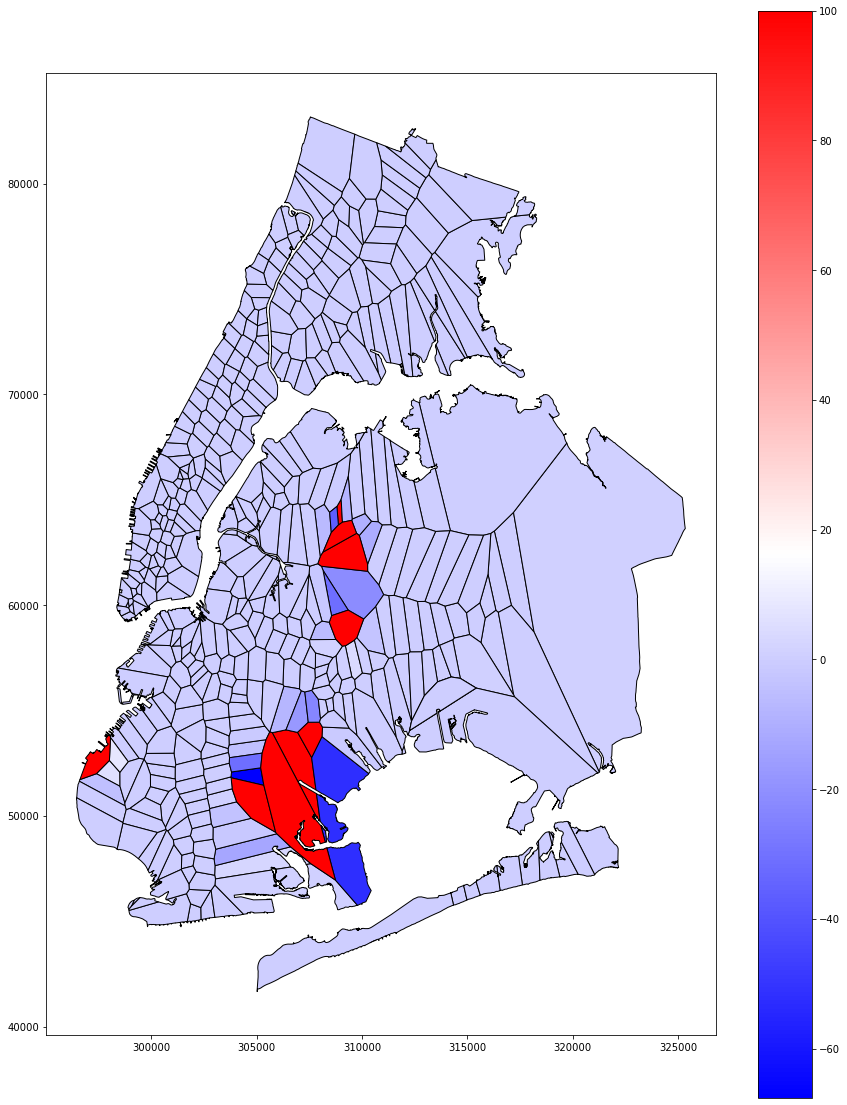

In [756]:
fig, ax = plt.subplots(figsize = (15, 20))
test_geo.plot(column = 'pct_change_activity', ax = ax, legend = True, cmap = 'bwr', edgecolor = 'black')
# test_geo.apply(
#     lambda x: ax.annotate(
#         text =  x['VoroID'],
#         xy = x['geometry'].centroid.coords[0],
#         ha = 'center'    
#     ),
#     axis = 1
# )

##### Full Merge and Analysis

In [765]:
wd_eve_merge = voro.merge(wd_evening_pred, on = 'VoroID')
wd_eve_merge = wd_eve_merge.merge(wd_evening_pred_is, on = 'Complex ID', how = 'left', indicator = True,  suffixes = ('_pred', '_is'))
wd_eve_merge.loc[wd_eve_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']] = wd_eve_merge.loc[wd_eve_merge._merge != 'both',  ['entries_is', 'exits_is', 'activity_is']].fillna(0)

wd_eve_merge['delta_activity'] = wd_eve_merge['activity_pred'] - wd_eve_merge['activity_is'] 
wd_eve_merge['delta_entries'] = wd_eve_merge['entries_pred'] - wd_eve_merge['entries_is']
wd_eve_merge['delta_exits'] = wd_eve_merge['exits_pred'] - wd_eve_merge['exits_is']
wd_eve_merge['pct_change_activity'] = (wd_eve_merge['activity_pred'] - wd_eve_merge['activity_is'])/wd_eve_merge['activity_is']*100
wd_eve_merge['pct_change_activity'] = wd_eve_merge['pct_change_activity'].replace({np.inf:100})    

wd_eve_merge = gpd.GeoDataFrame(wd_eve_merge, geometry = 'geometry', crs = voro.crs)

In [766]:
wd_morn_merge = voro.merge(wd_morning_pred, on = 'VoroID')
wd_morn_merge = wd_morn_merge.merge(wd_morning_pred_is, on = 'Complex ID', how = 'left', indicator = True,  suffixes = ('_pred', '_is'))
wd_morn_merge.loc[wd_morn_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']] = wd_morn_merge.loc[wd_morn_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']].fillna(0)

wd_morn_merge['delta_activity'] = wd_morn_merge['activity_pred'] - wd_morn_merge['activity_is'] 
wd_morn_merge['delta_entries'] = wd_morn_merge['entries_pred'] - wd_morn_merge['entries_is']
wd_morn_merge['delta_exits'] = wd_morn_merge['exits_pred'] - wd_morn_merge['exits_is']
wd_morn_merge['pct_change_activity'] = (wd_morn_merge['activity_pred'] - wd_morn_merge['activity_is'])/wd_morn_merge['activity_is']*100
wd_morn_merge['pct_change_activity'] = wd_morn_merge['pct_change_activity'].replace({np.inf:100})    

wd_morn_merge = gpd.GeoDataFrame(wd_morn_merge, geometry = 'geometry', crs = voro.crs)
#wd_morn_merge

In [767]:
wd_overnight_merge = voro.merge(wd_overnight_pred, on = 'VoroID')
wd_overnight_merge = wd_overnight_merge.merge(wd_overnight_pred_is, on = 'Complex ID', how = 'left', indicator = True,  suffixes = ('_pred', '_is'))
wd_overnight_merge.loc[wd_overnight_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']] = wd_overnight_merge.loc[wd_overnight_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']].fillna(0)

wd_overnight_merge['delta_activity'] = wd_overnight_merge['activity_pred'] - wd_overnight_merge['activity_is'] 
wd_overnight_merge['delta_entries'] = wd_overnight_merge['entries_pred'] - wd_overnight_merge['entries_is']
wd_overnight_merge['delta_exits'] = wd_overnight_merge['exits_pred'] - wd_overnight_merge['exits_is']
wd_overnight_merge['pct_change_activity'] = (wd_overnight_merge['activity_pred'] - wd_overnight_merge['activity_is'])/wd_overnight_merge['activity_is']*100    
wd_overnight_merge['pct_change_activity'] = wd_overnight_merge['pct_change_activity'].replace({np.inf:100})

wd_overnight_merge = gpd.GeoDataFrame(wd_overnight_merge, geometry = 'geometry', crs = voro.crs)
#wd_overnight_merge

In [768]:
we_morning_merge = voro.merge(we_morning_pred, on = 'VoroID')
we_morning_merge = we_morning_merge.merge(we_morning_pred_is, on = 'Complex ID', how = 'left', indicator = True,  suffixes = ('_pred', '_is'))
we_morning_merge.loc[we_morning_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']] = we_morning_merge.loc[we_morning_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']].fillna(0)

we_morning_merge['delta_activity'] = we_morning_merge['activity_pred'] - we_morning_merge['activity_is'] 
we_morning_merge['delta_entries'] = we_morning_merge['entries_pred'] - we_morning_merge['entries_is']
we_morning_merge['delta_exits'] = we_morning_merge['exits_pred'] - we_morning_merge['exits_is']
we_morning_merge['pct_change_activity'] = (we_morning_merge['activity_pred'] - we_morning_merge['activity_is'])/we_morning_merge['activity_is']*100    
we_morning_merge['pct_change_activity'] = we_morning_merge['pct_change_activity'].replace({np.inf:100})

we_morning_merge = gpd.GeoDataFrame(we_morning_merge, geometry = 'geometry', crs = voro.crs)
#we_morning_merge

In [769]:
we_evening_merge = voro.merge(we_evening_pred, on = 'VoroID')
we_evening_merge = we_evening_merge.merge(we_evening_pred_is, on = 'Complex ID', how = 'left', indicator = True,  suffixes = ('_pred', '_is'))
we_evening_merge.loc[we_evening_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']] = we_evening_merge.loc[we_evening_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']].fillna(0)

we_evening_merge['delta_activity'] = we_evening_merge['activity_pred'] - we_evening_merge['activity_is'] 
we_evening_merge['delta_entries'] = we_evening_merge['entries_pred'] - we_evening_merge['entries_is']
we_evening_merge['delta_exits'] = we_evening_merge['exits_pred'] - we_evening_merge['exits_is']
we_evening_merge['pct_change_activity'] = (we_evening_merge['activity_pred'] - we_evening_merge['activity_is'])/we_evening_merge['activity_is']*100    
we_evening_merge['pct_change_activity'] = we_evening_merge['pct_change_activity'].replace({np.inf:100})

we_evening_merge = gpd.GeoDataFrame(we_evening_merge, geometry = 'geometry', crs = voro.crs)
#we_evening_merge

In [770]:
we_overnight_merge = voro.merge(we_overnight_pred, on = 'VoroID')
we_overnight_merge = we_overnight_merge.merge(we_overnight_pred_is, on = 'Complex ID', how = 'left', indicator = True,  suffixes = ('_pred', '_is'))
we_overnight_merge.loc[we_overnight_merge._merge != 'both', ['entries_is', 'exits_is', 'activity_is']] = we_overnight_merge.loc[we_overnight_merge._merge != 'both',  ['entries_is', 'exits_is', 'activity_is']].fillna(0)

we_overnight_merge['delta_activity'] = we_overnight_merge['activity_pred'] - we_overnight_merge['activity_is'] 
we_overnight_merge['delta_entries'] = we_overnight_merge['entries_pred'] - we_overnight_merge['entries_is']
we_overnight_merge['delta_exits'] = we_overnight_merge['exits_pred'] - we_overnight_merge['exits_is']
we_overnight_merge['pct_change_activity'] = (we_overnight_merge['activity_pred'] - we_overnight_merge['activity_is'])/we_overnight_merge['activity_is']*100    
we_overnight_merge['pct_change_activity'] = we_overnight_merge['pct_change_activity'].replace({np.inf:100})

we_overnight_merge = gpd.GeoDataFrame(we_overnight_merge, geometry = 'geometry', crs = voro.crs)
#we_overnight_merge

<AxesSubplot:>

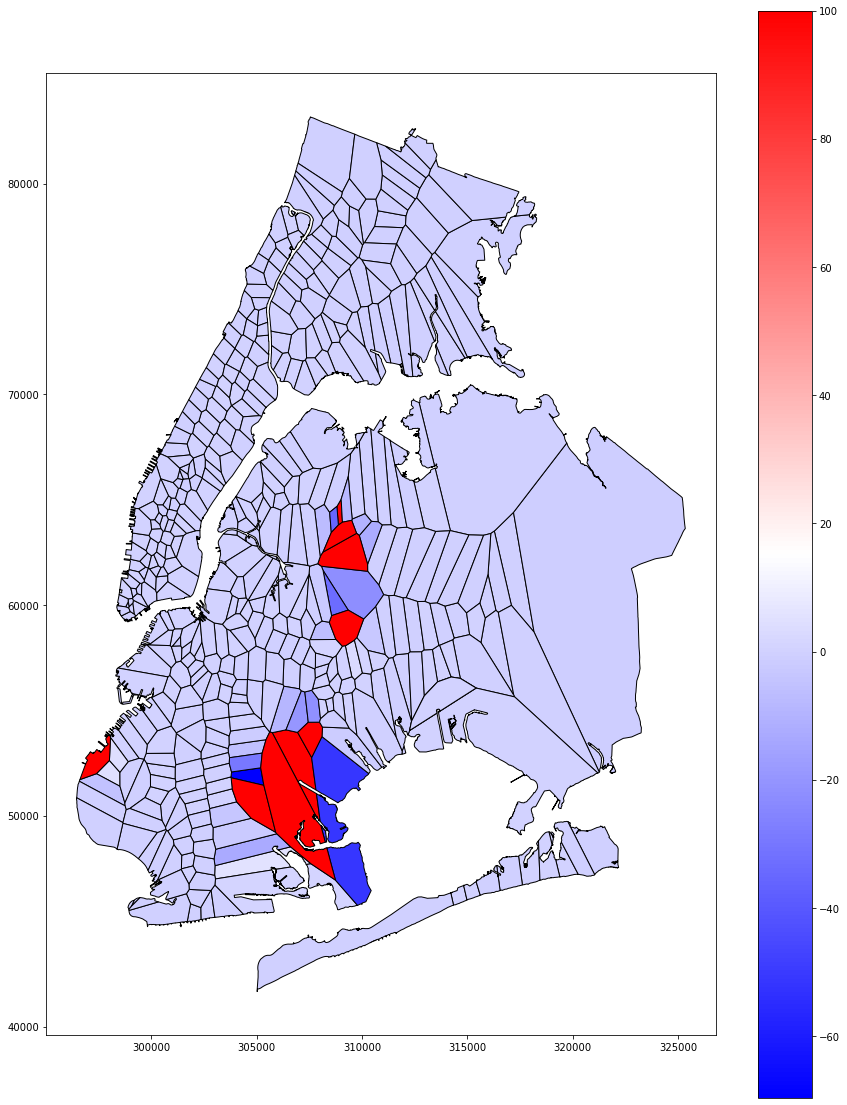

In [771]:
fig, ax = plt.subplots(figsize = (15, 20))
wd_morn_merge.plot(column = 'pct_change_activity', ax = ax, legend = True, cmap = 'bwr', edgecolor = 'black')

<AxesSubplot:>

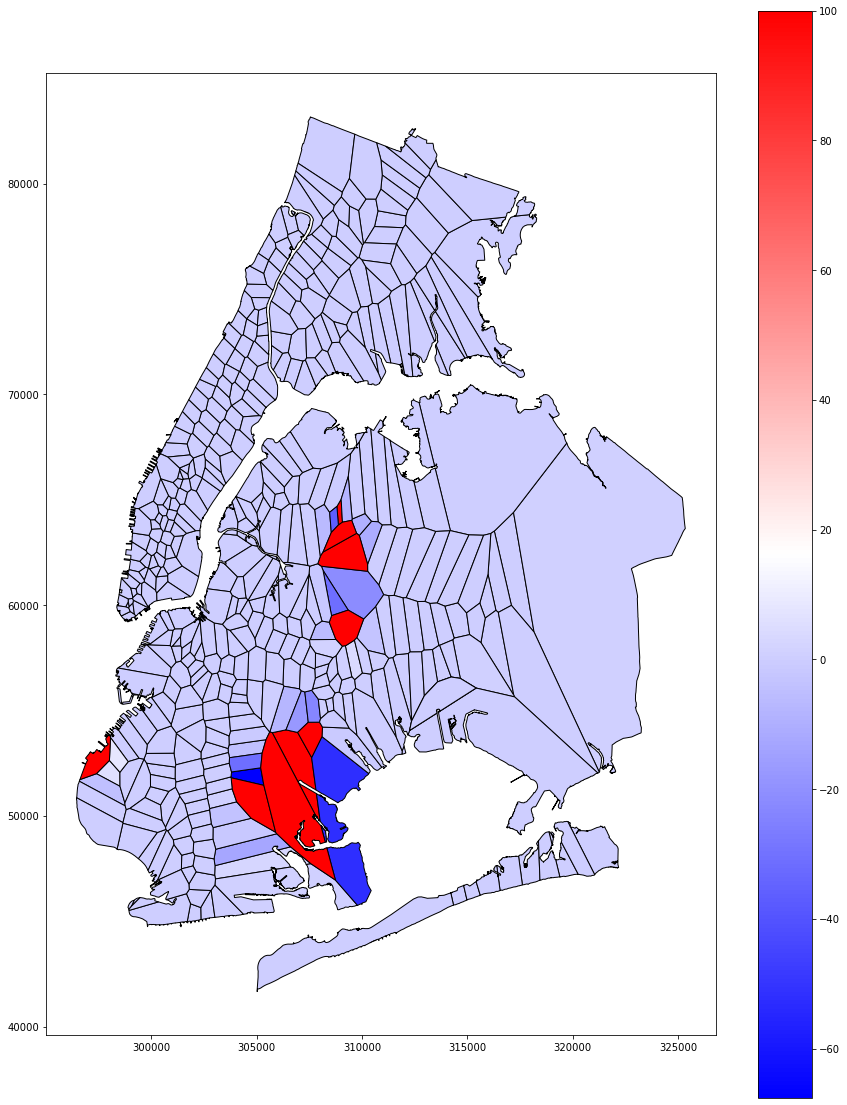

In [772]:
fig, ax = plt.subplots(figsize = (15, 20))
wd_eve_merge.plot(column = 'pct_change_activity', ax = ax, legend = True, cmap = 'bwr', edgecolor = 'black')

In [775]:
peak_pred_act = wd_morn_merge['activity_pred'] + wd_eve_merge['activity_pred']

In [776]:
peak_is_act = wd_morn_merge['activity_is'] + wd_eve_merge['activity_is']

In [780]:
peak_merge = pd.DataFrame({'geometry': wd_morn_merge.geometry.values, 'activity_pred': peak_pred_act.values, "activity_is": peak_is_act.values})
peak_merge['pct_change_activity'] = (peak_merge['activity_pred'] - peak_merge['activity_is'])/peak_merge['activity_is']*100
peak_merge['pct_change_activity'] = peak_merge['pct_change_activity'].replace({np.inf:100})
peak_merge = gpd.GeoDataFrame(peak_merge, geometry = 'geometry', crs = voro.crs)

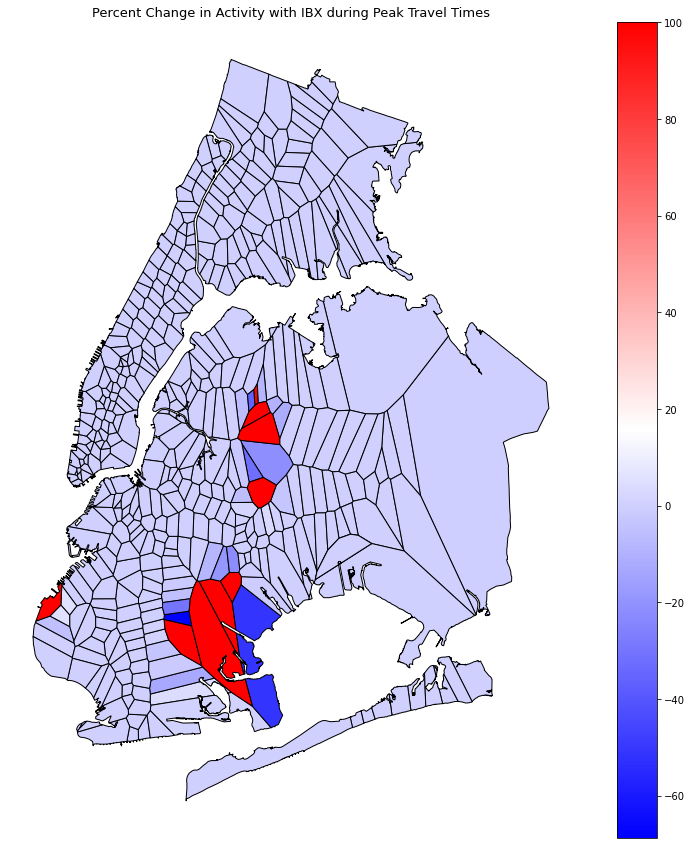

In [791]:
fig, ax = plt.subplots(figsize = (15, 15))
peak_merge.plot(column = 'pct_change_activity', ax = ax, legend = True, cmap = 'bwr', edgecolor = 'black')
ax.axis('off')
ax.set_title('Percent Change in Activity with IBX during Peak Travel Times', fontsize = 13)
plt.savefig(r'..\Data Vis\pct_change_activity_peak.png', dpi = 300, bbox_inches = 'tight')